# Exercise 1
for NLP lab SoSe18 by Nico Lutz

#### Env:
* python 3
* nltk

#### Resources:
* https://nlpforhackers.io/training-pos-tagger/

### In this lab you will learn how to train your own POS tagger classifier and test it against some pre-trained models

#### Pleases implement your code and upload it to git using (jupyter notebook format)

#### Classifiers

1. ``model1`` = your POS tagger model (english)
2. ``model2`` = pre-trained POS tagger model using NLTK (maxentropy english)
3. ``model3.x`` = rule-based classifiers (x = 1 to 5)

4. ``model4`` = your POS tagger model (not english)
5. ``model5`` = pre-trained POS tagger model using RDRPOSTagger [1](http://rdrpostagger.sourceforge.net/) or TreeTagger [2](http://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/) (not english)

note: for ``model1`` and ``model3`` you can try different classifiers: Hidden Markov Model, Logistic Regression, Maximum Entropy Markov Models, Decision Trees, Naive Bayes, etc..**choose one**!

#### Corpora
1. ``X1`` = nltk.corpus.treebank (english)
2. ``X2`` = nltk.corpus.brown (english)
3. ``X3`` = other language (not english)

**note**: data split for training/test = 0.8/0.2 (sequencial)

#### Task 1
- get results for english (**plot a graph with all classifiers x results**)
    - ``performance 1.1`` = ``model1`` in ``X1``
    - ``performance 1.2`` = ``model2`` in ``X1``
    - ``performance 1.3.x`` = ``model3.x`` in ``X1``
    
    - ``performance 1.4`` = ``model1`` in ``X2``
    - ``performance 1.5`` = ``model2`` in ``X2``
    - ``performance 1.6.x`` = ``model3.x`` in ``X2``

#### Task 2
- train your model with standard features (**plot a graph with all classifiers x results**)
    - ``performance 2.1`` = ``model4`` in ``X3``
    - ``performance 2.2`` = ``model5`` in ``X3``

### notes:

#### 1. you can save your trained models using pickle (import pickle)
#### 2. please upload your jupyter file to git
#### 3. this script just gives a general idea, please organize and comment your code accordingly
#### 4. you have to make sure the language you choose is supported for one of the classifiers suggested (see above) AND you are able to find a corpus in that language (example: [Tiger Corpus for German](http://www.ims.uni-stuttgart.de/forschung/ressourcen/korpora/TIGERCorpus/download/start.html)). You can also search the Web in order to try to find a pre-trained classifier in your language. If that is not possible, just choose one existing. Please also make sure the language you have choosen _does not_ overlap with other students.
#### 5. If you are able to find an annotated corpus and format is CoNLL, you can easly read it using the following method in NLTK:
```corp = nltk.corpus.ConllCorpusReader()```
#### 6. a nice library to create charts: https://plot.ly/python/bar-charts/

In [1]:
import nltk
from nltk import word_tokenize, pos_tag
# maybe you need to download NLTK data
# nltk.download('all')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

## Datasets/Corpora

In [2]:
split=0.8

In [3]:
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:],
        
    }

In [4]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]
 

In [5]:
def transform_to_dataset(tagged_sentences):
    X, y = [], []
 
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
 
    return X, y

In [6]:
def pos_tag(clf, sentence):
    print('checking...')
    tagged_sentence = []
    tags = clf.predict([features(sentence, index) for index in range(len(sentence))])
    return zip(sentence, tags)

### X1: Corpus TreeBank

In [7]:
#load treebank corpus
#nltk.download('treebank')
X1_tagged_sents = nltk.corpus.treebank.tagged_sents()
print(X1_tagged_sents[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [8]:
# Split the dataset for training and testing
cutoff = int(split * len(X1_tagged_sents))
training_sentences = X1_tagged_sents[:cutoff]
test_sentences = X1_tagged_sents[cutoff:]
X1_test_sents = nltk.corpus.treebank.sents()[cutoff:]

print(len(training_sentences))   
print(len(test_sentences))         
X1, y1 = transform_to_dataset(training_sentences)
X1_test, y1_test = transform_to_dataset(test_sentences)

3131
783


### X2: Corpus Brown

In [9]:
#load brown corpus
#nltk.download('brown')
X2_tagged_sents = nltk.corpus.brown.tagged_sents()
print(X2_tagged_sents[0])

[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]


In [10]:
# Split the dataset for training and testing
cutoff = int(split * len(X2_tagged_sents))
training_sentences = X2_tagged_sents[:cutoff]
test_sentences = X2_tagged_sents[cutoff:]
X2_test_sents = nltk.corpus.brown.sents()[cutoff:]

 
print(len(training_sentences))   
print(len(test_sentences))      
X2, y2 = transform_to_dataset(training_sentences)
X2_test, y2_test = transform_to_dataset(test_sentences)

45872
11468


### X3: other language: universal treebank finnish Corpus

In [11]:
from nltk.corpus import universal_treebanks as ut
#ut.fileids()

In [37]:
# The Set is already split into train and test set...
ut_test = ut.tagged_sents('ch/fi/fi-universal-ch-test.conll')
ut_test_raw = ut.sents('ch/fi/fi-universal-ch-test.conll')
ut_train = ut.tagged_sents('ch/fi/fi-universal-ch-train.conll')

In [38]:
X3, y3 = transform_to_dataset(ut_train)
X3_test, y3_test = transform_to_dataset(ut_test)

print('length train set',len(X3))
print('length test set',len(X3_test))

length train set 163953
length test set 9279


## Classifiers

### 1. ``model1`` = your POS tagger model (english)
Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import DictVectorizer

#### Train and test on X1

In [23]:
clf1 = Pipeline([
    ('vectorizer', DictVectorizer()),
    ('classifier', MultinomialNB(alpha=0.05)),
])
size = 10000
clf1.fit(X1[:size],y1[:size])
print('Training complete for dataset X1')

Training complete for dataset X1


In [24]:
acc_model1_on_X1 = clf1.score(X1_test, y1_test)
print("Accuracy model1 on X1:", acc_model1_on_X1)

Accuracy model1 on X1: 0.89814861021


In [31]:
acc_model1_on_X2 = clf1.score(X2_test, y2_test)
print("Accuracy model1 on X2:", acc_model1_on_X2)

Accuracy model1 on X2: 0.524737532086


In [26]:
print(list(pos_tag(clf1, word_tokenize('Hello world, lets do something awesome today!'))))

checking...
[('Hello', 'NNP'), ('world', 'NN'), (',', ','), ('lets', 'NNS'), ('do', 'VBP'), ('something', 'VBG'), ('awesome', 'VBP'), ('today', 'NN'), ('!', '.')]


# 2. ``model2`` = pre-trained POS tagger model using NLTK (maxentropy english)
https://explosion.ai/blog/dead-code-should-be-buried

using a simple nltk.pos_tag

In [27]:
import numpy as np

In [28]:
_, model2_X1 = transform_to_dataset(nltk.pos_tag_sents(X1_test_sents))
acc_model2_on_X1 = np.mean(np.array(y1_test) == model2_X1)
print("Accuracy model2 on X1:", acc_model2_on_X1)

Accuracy model2 on X1: 0.893707270822


In [30]:
_, model2_X2 = transform_to_dataset(nltk.pos_tag_sents(X2_test_sents))
acc_model2_on_X2 = np.mean(np.array(y2_test) == model2_X2)
print("Accuracy model2 on X2:", acc_model2_on_X2)

Accuracy model2 on X2: 0.606221012856


# 3. ``model3.x`` = rule-based classifiers (x = 1 to 5)

* 3.1 = Default
* 3.2 = Unigram
* 3.3 = Bigram
* 3.4 = Trigram
* 3.5 = Regex

In [32]:
patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'),               
             (r'.*s$', 'NNS'), (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]

def_tagger = nltk.DefaultTagger('NN')
uni_tagger = nltk.UnigramTagger(X1_tagged_sents)
big_tagger = nltk.BigramTagger(X1_tagged_sents)
tri_tagger = nltk.TrigramTagger(X1_tagged_sents)
reg_tagger = nltk.RegexpTagger(patterns)

In [33]:
cutoff = int(split * len(X1_tagged_sents))

train_sents = X1_tagged_sents[:cutoff]
test_sents = X1_tagged_sents[cutoff:]

print('X1')
# performance of Default Tagger
print('Default Tagger')
print(def_tagger.evaluate(train_sents))
acc_model31_on_X1 = def_tagger.evaluate(test_sents)
print(acc_model31_on_X1)
print()
# performance of Unigram Tagger
print('Unigram Tagger')
print(uni_tagger.evaluate(train_sents))
acc_model32_on_X1 = uni_tagger.evaluate(test_sents)
print(acc_model31_on_X1)
print()
# performance of Bigram Tagger
print('Bigram Tagger')
print(big_tagger.evaluate(train_sents))
acc_model33_on_X1 = big_tagger.evaluate(test_sents)
print(acc_model33_on_X1)
print()
# performance of Trigram Tagger
print('Trigram Tagger')
print(tri_tagger.evaluate(train_sents))
acc_model34_on_X1 = tri_tagger.evaluate(test_sents)
print(acc_model33_on_X1)
print()
# performance of Regex Tagger
print('Regex Tagger')
print(reg_tagger.evaluate(train_sents))
acc_model35_on_X1 = reg_tagger.evaluate(test_sents)
print(acc_model35_on_X1)
print()

X1
Default Tagger
0.12729888264692388
0.1447677029791906

Unigram Tagger
0.9591502660069199
0.1447677029791906

Bigram Tagger
0.9134392400510931
0.9225011228105194

Trigram Tagger
0.9078958790629612
0.9225011228105194

Regex Tagger
0.2138472413408237
0.24232746145017217



In [34]:
cutoff = int(split * len(X2_tagged_sents))

train_sents = X2_tagged_sents[:cutoff]
test_sents = X2_tagged_sents[cutoff:]

print('X2')
# performance of Default Tagger
print('Default Tagger')
print(def_tagger.evaluate(train_sents))
acc_model31_on_X2 = def_tagger.evaluate(test_sents)
print(acc_model31_on_X2)
print()
# performance of Unigram Tagger
print('Unigram Tagger')
print(uni_tagger.evaluate(train_sents))
acc_model32_on_X2 = uni_tagger.evaluate(test_sents)
print(acc_model31_on_X2)
print()
# performance of Bigram Tagger
print('Bigram Tagger')
print(big_tagger.evaluate(train_sents))
acc_model33_on_X2 = big_tagger.evaluate(test_sents)
print(acc_model33_on_X2)
print()
# performance of Trigram Tagger
print('Trigram Tagger')
print(tri_tagger.evaluate(train_sents))
acc_model34_on_X2 = tri_tagger.evaluate(test_sents)
print(acc_model33_on_X2)
print()
# performance of Regex Tagger
print('Regex Tagger')
print(reg_tagger.evaluate(train_sents))
acc_model35_on_X2 = reg_tagger.evaluate(test_sents)
print(acc_model35_on_X2)
print()

X2
Default Tagger
0.13525702141385765
0.10997763652187324

Unigram Tagger
0.5047925475120605
0.10997763652187324

Bigram Tagger
0.0471037497218383
0.059131019135646064

Trigram Tagger
0.02495595347707233
0.059131019135646064

Regex Tagger
0.1989790189517438
0.17594438874995869



# 4. ``model4`` = your POS tagger model (not english)

In [39]:
clf2 = Pipeline([
    ('vectorizer', DictVectorizer()),
    ('classifier', MultinomialNB(alpha=0.05)),
])
size = 10000
clf2.fit(X3[:size],y3[:size])
print('Training complete for dataset X3')

Training complete for dataset X3


In [40]:
acc_model4_on_X3 = clf2.score(X3_test, y3_test)
print("Accuracy:", acc_model4_on_X3)

Accuracy: 0.811294320509


# 5. ``model5`` = pre-trained POS tagger model using RDRPOSTagger [1](http://rdrpostagger.sourceforge.net/) or TreeTagger [2](http://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/) (not english)


I am using [treetagger](http://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/) with a [wrapper](http://treetaggerwrapper.readthedocs.io/en/latest/) to load the Treetagger more easily.

In [41]:
import treetaggerwrapper

In [42]:
tagger = treetaggerwrapper.TreeTagger(TAGDIR='/Users/nicolutz/UNI Bonn/SS18/NLP/task1/', TAGLANG='fi')

In [43]:
x3_test_raw = ""
for each in X3_test:
    x3_test_raw+=each['word']+" "
print(x3_test_raw[:100])

Pelkkää tyhjyyttä Kävin tänään katsomassa Suomen Perinteisen Teatterin näytelmän Ranta . Jo teatteri


In [44]:
len(x3_test_raw)

66804

In [45]:
tt = tagger.tag_text(x3_test_raw)

In [46]:
mt = treetaggerwrapper.make_tags(tt,exclude_nottags=True)

Since treetagger pos is much more fine grained([info](http://www.ling.helsinki.fi/kieliteknologia/tutkimus/treebank/sources/FinnTreeBankManual.pdf)) then the test sets annotations we need a way to compare them: I choose to simplyify the tags and only choose the first annotation and not take tense, person, etc into account

In [47]:
formated_mt=[each.pos.split("_")[0] for each in mt]

Have a look at the set of annotations:

In [48]:
formated_mt_set = set(formated_mt)
print (formated_mt_set)

{'SENT', 'PrfPrc', 'V', 'Abbr', 'Adv', 'PrsPrc', 'Num', 'Pron', 'NON-TWOL', 'A', 'Punct', 'CC', 'Interj', 'Adp', 'AgPcp', 'CS', 'N'}


In [49]:
y3_test_set = set(y3_test)
print (y3_test_set)

{'V', 'Adv', 'C', 'Num', 'Symb', 'Pron', 'Foreign', 'A', 'Punct', 'Interj', 'Adp', 'N'}


Still it seems to be impossible to compare the nltk.corpus test set to the taggers set. Since the Treetager uses much more annotations then the nltk test set.

# Performance
graphs and plots...

In [50]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn #beautiful matplolib plots
from collections import namedtuple


## Task 1

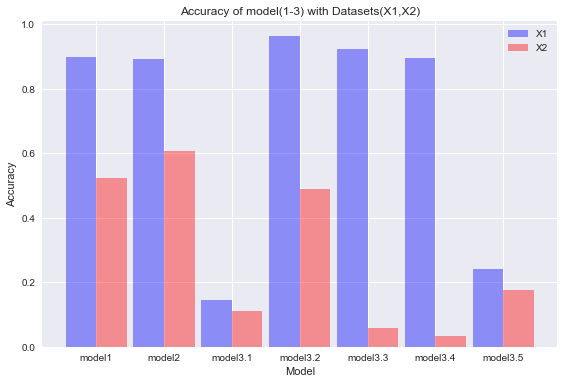

In [56]:

acc_X1 = (acc_model1_on_X1, acc_model2_on_X1, acc_model31_on_X1, acc_model32_on_X1, acc_model33_on_X1, acc_model34_on_X1, acc_model35_on_X1)
acc_X2 = (acc_model1_on_X2, acc_model2_on_X2, acc_model31_on_X2, acc_model32_on_X2, acc_model33_on_X2, acc_model34_on_X2, acc_model35_on_X2)
n_groups = 7

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.45

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, acc_X1, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='X1')

rects2 = ax.bar(index + bar_width, acc_X2, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='X2')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of model(1-3) with Datasets(X1,X2)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('model1', 'model2', 'model3.1', 'model3.2', 'model3.3', 'model3.4', 'model3.5'))
ax.legend()

fig.tight_layout()
plt.show()


## Task2

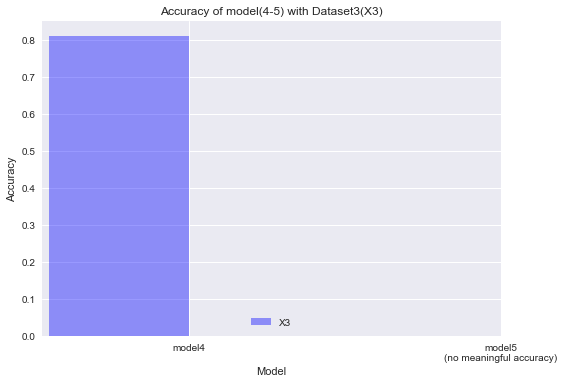

In [57]:
acc_model5_on_X3=np.nan

acc_X1 = (acc_model4_on_X3, acc_model5_on_X3)
n_groups = 2

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.45

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, acc_X1, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='X3')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of model(4-5) with Dataset3(X3)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('model4', 'model5\n(no meaningful accuracy)'))
ax.legend()

fig.tight_layout()
plt.show()
